In [1]:
require(tidyverse)
require(gplots)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



## Make two example datasets that share the same `samples`

In [2]:
feature_names_1 <- letters[1:10]

sample_names <- c('one', 'two', 'three', 'four', 'five')

feature_names_2 <- toupper(letters[1:6])

n_samp <- length(sample_names)

In [3]:
n_feat_1 <- length(feature_names_1)


fake_data_1 <- tibble(
    feature_name = rep(feature_names_1, each=n_samp),
    sample_name = rep(sample_names, n_feat_1),
    fake_data = rnorm(n_samp * n_feat_1)
) %>%
    spread(sample_name, fake_data, convert = F) 

In [4]:
n_feat_2 <- length(feature_names_2)

fake_data_2 <- tibble(
    feature_name = rep(feature_names_2, each=n_samp),
    sample_name = rep(sample_names, n_feat_2),
    fake_data = rnorm(n_samp * n_feat_2)
) %>%
    spread(sample_name, fake_data, convert = F)

## A look at the two datasets

In [5]:
fake_data_1
fake_data_2

feature_name,five,four,one,three,two
a,-0.30804091,-0.60057805,-1.4257502,-0.64000103,-0.6110941
b,0.37193819,-1.61499980,1.0147489,-1.04284709,0.7483879
c,0.16056320,-0.20054288,-0.8486122,-0.75697179,1.5498211
d,-0.15187222,-0.10052864,0.7784733,0.99318421,0.4476545
e,0.83527768,0.48272504,-0.7245426,0.04706001,-0.4852665
f,0.15676057,-0.05929083,-1.1926036,0.09775949,0.7786353
g,0.54758519,-0.72130913,0.3758283,-0.12564042,0.4011871
h,0.56385460,-1.16183637,-1.2407805,0.40772227,0.6632522
i,-1.25751800,-0.10246365,-0.6699973,0.26971876,-1.4188001
j,-0.02104251,0.04059806,-1.1876853,0.65662338,0.2888536


feature_name,five,four,one,three,two
A,-0.73933235,-1.8189606,-0.04197084,-0.15306266,0.42074425
B,-0.21641021,0.6079128,0.43627017,-0.80814009,2.03643319
C,-0.05496129,-0.0266991,2.04004935,-2.02251337,0.08372876
D,-0.04115620,-1.5496909,0.34933362,-0.22488306,-0.68289112
E,0.60733103,2.6431095,0.06662335,0.09854027,-0.34294021
F,0.92609452,-0.9282802,1.08704848,0.48474879,0.15003904


Dataset 1 is effectively a matrix which lists the values for features `a` - `j` for five samples, named `one`, `two`, etc.

Dataset 2 is similar; the feature names are `A` - `F` and the sample names are the same.

Suppose dataset 1 and dataset 2 arise from different computational algorithms for feature identification and quantification from the same underlying raw data -- this is why they have the same samples.  To compare the output of the algorithms, we can just combine the data and form a correlation matrix.  Suppose that dataset 1 comes from an "untargeted" analysis and dataset 2 comes from a targeted analysis, for example.

## combine the data and find the cross-correlation of these features

In [6]:
all_data <- bind_rows(list(fake_data_2, fake_data_1))

cor_mat <- all_data %>% select_if(is.numeric) %>% t %>% cor

names_cor_mat <- all_data %>% pull(feature_name)

rownames(cor_mat) <- names_cor_mat
colnames(cor_mat) <- names_cor_mat

The resulting `cor_mat` matrix is a global correlation matrix.  It contains the correlation coefficients across all samples -- from both datasets -- for each feature.  

If you want to look at just the "cross-correlation" part of the matrix, where features from one set are compared to another:

In [7]:
out <- cor_mat[rownames(cor_mat) %in% feature_names_1, 
               colnames(cor_mat) %in% feature_names_2]
out

,A,B,C,D,E,F
a,-0.31333399,-0.096965165,-0.6727666,-0.4390000,0.24263826,-0.3329497
b,0.71394703,0.396498379,0.6405693,0.6940479,-0.73200154,0.7362177
c,0.30079834,0.792169399,-0.0131976,-0.3265730,-0.22589979,-0.2218268
d,0.68816092,-0.177309213,-0.1288040,0.5026382,-0.64704716,0.4082892
e,-0.71641090,-0.466076605,-0.4479728,-0.3426402,0.58887678,-0.2716468
f,0.10221905,0.328553483,-0.6238286,-0.4690007,-0.07778209,-0.3728706
g,0.72305107,0.147414006,0.3467077,0.7797303,-0.80562790,0.8480771
h,0.48512270,-0.007973756,-0.5966895,0.1676881,-0.55545871,0.2639957
i,-0.39081142,-0.607470654,-0.4667758,-0.2281641,0.40418704,-0.3383404
j,-0.03825721,-0.114891371,-0.9360560,-0.4552984,0.03597642,-0.4101893


Since in this matrix is just random data, there are no particularly high correlations.  In real data, the features identified in dataset 1 would overlap with the features identified in dataset 2.  For example if feature `A` from dataset 2 was really the same as feature `g` in dataset 1, we would expect the correlation coefficient to be very close to 1.0.  

The correlation matrix can be used to do clustering, also in R or python.  

In [8]:
rsquared_dist_mat <- 1 - out**2


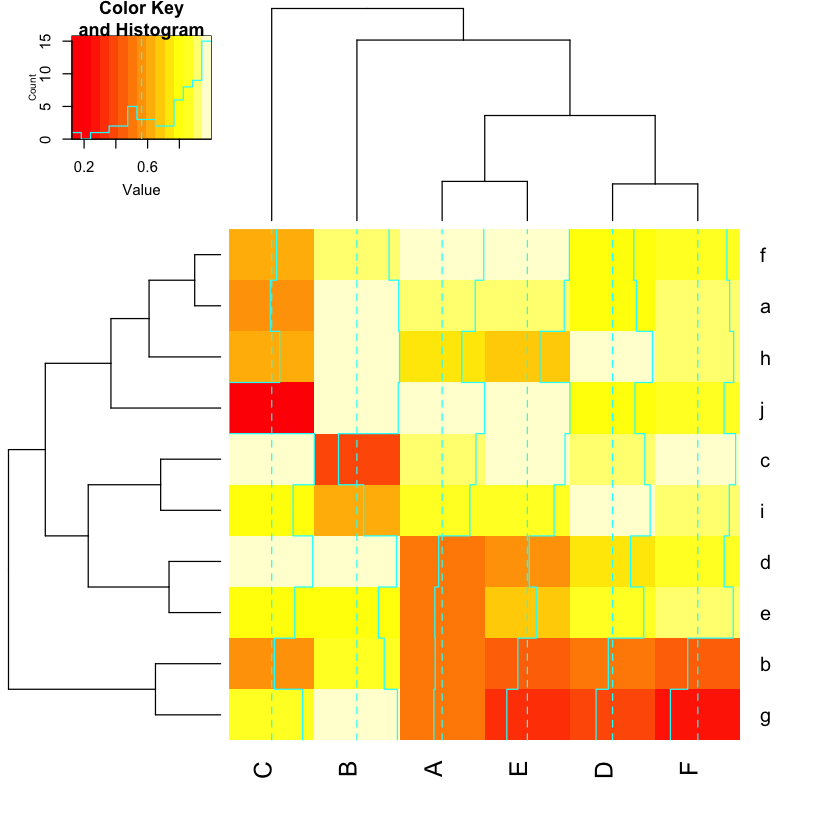

In [9]:
heatmap.2(rsquared_dist_mat)